In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
data = pd.read_csv('/Users/kathanbhavsar/Desktop/Python,DS,ML/08-Linear-Regression-Models/Advertising.csv')

In [5]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
X = data.drop('sales',axis = 1)
y = data["sales"]

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly = PolynomialFeatures(degree=2,include_bias=False)

In [15]:
trans = poly.fit_transform(X)

In [16]:
trans

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [17]:
trans.shape

(200, 9)

In [19]:
trans[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [20]:

from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(trans, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression().fit(X_train,y_train)

In [36]:
pred = model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,pred)

0.9808386009966369

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
MAE = mean_absolute_error(y_test,pred)
MSE = mean_squared_error(y_test,pred)
RMSE = np.sqrt(MSE)

In [41]:
MAE

0.5905974833808126

In [42]:
RMSE

0.7233218473857629

In [43]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [46]:
trans[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [47]:
### Bad model increase in error while good model has a decrease in the error 

In [48]:
## If we are overfitting on the data we perform poor on the test data. In some algorithms this erro jump can be sudden instread of gradual 

In [49]:
train_rmse = []
test_rmse = []
for deg in range(1,10):
    poly_converter = PolynomialFeatures(degree=deg, include_bias=False)
    features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)
    
    model = LinearRegression().fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test,test_pred)))
    

In [50]:
train_rmse

[1.574596830590544,
 0.5950712355838925,
 0.4688758111822084,
 0.36946897017714847,
 0.24382206702917864,
 0.19926676373663968,
 0.5135622228924954,
 0.16122894028862542,
 0.17545818952544143]

In [51]:
test_rmse

[1.9485372043446387,
 0.7233218473857629,
 0.5392350985651256,
 1.3032266114493485,
 5.946743753557788,
 25.18208450699478,
 616.6369219655745,
 2509.2260776482976,
 141879.84374660568]

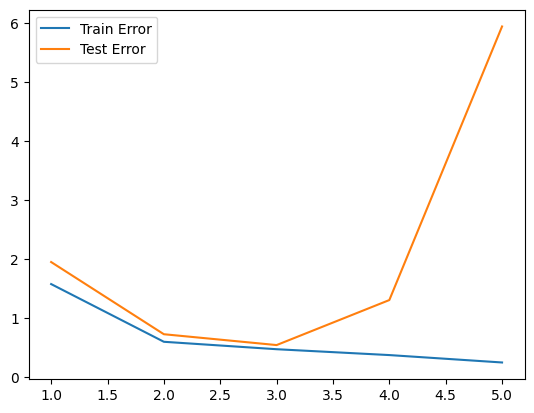

In [58]:
plt.plot(range(1,6),train_rmse[:5],label = 'Train Error')
plt.plot(range(1,6),test_rmse[:5],label = 'Test Error')
plt.legend()

In [65]:
from joblib import dump,load

In [66]:
final_poly = PolynomialFeatures(degree = 3,include_bias=False)

In [67]:
full_data = final_poly.fit_transform(X)

In [68]:
final_model = LinearRegression().fit(full_data,y)

In [70]:
dump(final_model,'polynomial_.joblib')
dump(final_poly,"Transformation.joblib")

['Transformation.joblib']

In [71]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [72]:
campaign = [[1500,34,53]]

In [73]:
loaded_convertor = load("Transformation.joblib")
loaded_model = load('polynomial_.joblib')

In [76]:
 campaign_transform = loaded_convertor.fit_transform(campaign)

In [77]:
loaded_model.predict(campaign_transform)

array([1770.65603762])